# **Détection de visages à partir d'une image ou d'une vidéo (stream)**
---
---
La détection des visages consiste à identifier le visage d'une personne dans une image ou une vidéo. Ainsi, il faudra analyser le contenu visuel afin de déterminer si les caractéristiques d'un visage d'une personne sont présents ou pas.

Les visages humains sont très variés (personnes d'origines, de sexes et de cultures différents). Les apporoches ML supervisées de détection des visages doivent être entraînés sur de larges quantités de données d'entrée pour pouvoir se généraliser sur de nouvelles données.

D'autre part, les approches proposées doivent être robustes aux différents types d'éclairage, aux transformations géométriques, etc.  Par conséquent, on augmente souvent les datasets d'apprentissage par des données vérifiant ces hypothèses.

Dans le cadre de TP, nous allons utiliser une implémentation OpenCV de la méthode de cascade de Haar qui est un modèle supervisé pré-entrainé.

**Méthode de casacde de Haar**

---



Cette méthode a été intrduite par Paul Viola et M.ichael Jones en 2001, [www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf](www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) [1].
L'idée principale de cette méthode consiste à utiliser une cascade de classificateurs pour détecter les différentes caractéristiques d'une image. Ces classificateurs sont ensuite combinés en un classificateur fort capable de distinguer avec précision les échantillons contenant un visage humain de ceux qui n'en contiennent pas.

Le classificateur Haar Cascade implémenté dans OpenCV est pré-entrainé sur un large ensemble de données de visages humains. Ainsi, il n'est pas nécessaire de le re-entrainer. Il suffit de charger le classificateur à partir de la bibliothèque et de l'utiliser pour détecter les visages sur une image d'entrée.



**Référence**
[1] P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001, Kauai, HI, USA, 2001, pp. I-I, doi: 10.1109/CVPR.2001.990517.

## ***Question 1- Lire une image contenant un visage***

## Importer les librairies
OpenCV, Numpy, Matplotlib

In [4]:
import cv2           # OpenCV pour le traitement d'image
import numpy as np    # NumPy pour les tableaux et calculs numériques
import matplotlib.pyplot as plt

## Charger et afficher l'image
Soit l'image visage.jpg (dans le fichier ci-joint). Lire et afficher cette image. Vérifier les dimensions de l'image

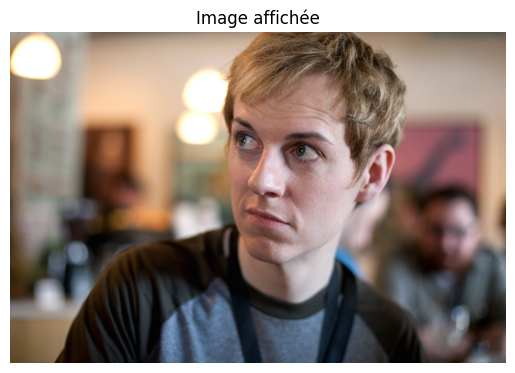

In [3]:
image = cv2.imread("visage.jpg")

# Convertir l'image de BGR à RGB pour un affichage correct avec Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.title("Image affichée")
plt.imshow(image_rgb)
plt.axis('off')  
plt.show()

## Convertir l'image en niveaux de gris

On convertit de BGR a GRay pour avoir une image gris, on oublie surtout pas de mettre CMap à gray qui est en quelque sorte notre color map car sans on applique la palette viridis (du violet au jaune)

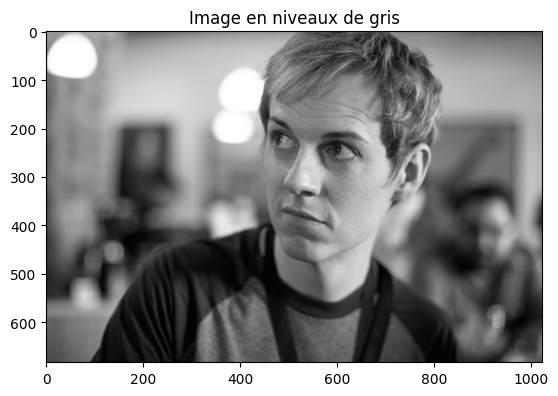

In [4]:
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.title("Image en niveaux de gris")
plt.imshow(image_grey, cmap='gray') 
plt.show()


## Instancier et charger le classifieur CascadeClassifier
Pour plus d'informations vous pouvez regarder [OpenCv CascadeClassifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

In [5]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

## Appliquer le classifieur

detectMultiScale veut une image gris c'est donc pour cela qu'on utilise image_grey et non image_rgb

In [6]:
face = face_classifier.detectMultiScale(
    image_grey, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

## Dessiner une boite englobante

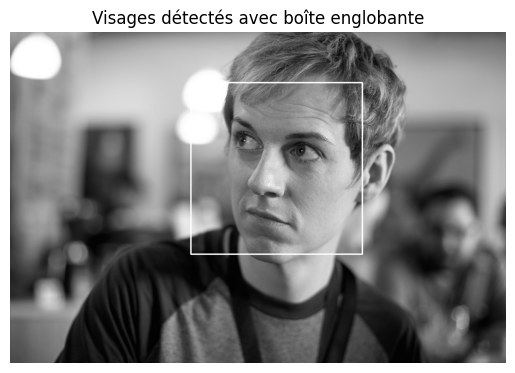

In [7]:
for (x, y, w, h) in face:
    # Dessiner un rectangle bleu autour du visage
    cv2.rectangle(
        image_grey,               # image sur laquelle dessiner
        (x, y),              # coin supérieur gauche du rectangle
        (x + w, y + h),      # coin inférieur droit du rectangle
        (255, 0, 0),         # couleur (B, G, R) → ici bleu
        2                    # épaisseur de la ligne (en pixels)
    )



plt.imshow(image_grey, cmap='gray')
plt.axis('off')
plt.title("Visages détectés avec boîte englobante")
plt.show()


ReConvertir l'image ---> Image couleur et afficher l'image

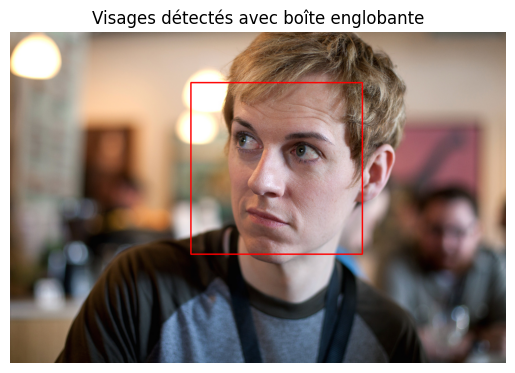

In [8]:
for (x, y, w, h) in face:
    # Dessiner un rectangle bleu autour du visage
    cv2.rectangle(
        image_rgb,               # image sur laquelle dessiner
        (x, y),              # coin supérieur gauche du rectangle
        (x + w, y + h),      # coin inférieur droit du rectangle
        (255, 0, 0),         # couleur (B, G, R) → ici bleu
        2                    # épaisseur de la ligne (en pixels)
    )


plt.imshow(image_rgb)
plt.axis('off')
plt.title("Visages détectés avec boîte englobante")
plt.show()

# Partie Détection de visage

### Lire à partir de la WebCam
Ecrire un programme permettant de détecter directement un visage à partir du flux WebCam et d'encadrer le visage si trouvé.
Vous pouvez utiliser
1.   cv2.VideoCapture(0) : capture de la vidéo / entrée WebCam
2.   Réaliser une boucle : While True : Pour parcourir les frames de la vidéo



In [9]:
#Lire à partir de la WebCam
video_capture = cv2.VideoCapture(0)

In [10]:
while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray_frame,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(40, 40)
    )
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.imshow("Video", frame)
    # Quitter sur la touche 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

On lit un flux vidéo de la webcam en appliquant Haar cascade pour détecter les visages et ensuite dessiner les boites englobante. On ouvre une page openCV que l'on quitte avec "q".

### Question 2- Evaluer les performances de cette approche de détection sur un dataset de détection de visage public.Vous pouver utiliser le dataset suivant Kaggle Face Detection Dataset. (Obligatoire - Utiliser au moins lamétrique IoU)

In [11]:
import os

Nous avons choisi d'utiliser le Data Set Kaggle Face detection qui contient des images de couleurs format JPG avec des dossiers contenant des fichiers TXT en format Yolo.

In [ ]:
data_dir = "C:\Users\Utilisateur\Desktop"
images_dir = os.path.join(data_dir, "images/train")
labels_dir = os.path.join(data_dir, "labels/train")   # tes .txt YOLO


On charger un classifieur Haar pré-entraîné pour la détection de visages dans OpenCV.

In [13]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                "haarcascade_frontalface_default.xml")

En détection de visage (ou objet), on veut savoir si une boîte détectée par l’algorithme est suffisamment proche de la boîte réelle.

Le score IoU permet de mesurer ce recouvrement.
Plus l’IoU est élevé (proche de 1), meilleure est la détection.

Aire_intersection = surface où les deux boîtes se chevauchent.

Aire_union = somme des deux aires moins l'intersection. 

On effectue Aire_intersection/ Aire_union pour obtenir l'IoU

In [14]:
def iou(boxA, boxB):
    """box = (x, y, w, h) en PIXELS"""
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0]+boxA[2], boxB[0]+boxB[2])
    yB = min(boxA[1]+boxA[3], boxB[1]+boxB[3])
    inter = max(0, xB-xA) * max(0, yB-yA)
    if inter == 0:
        return 0.0
    areaA = boxA[2] * boxA[3]
    areaB = boxB[2] * boxB[3]
    return inter / (areaA + areaB - inter)

Étant donné que les annotations des boîtes englobantes sont fournies dans le format normalisé YOLO dans des fichiers txt. Pour pouvoir comparer ces boîtes avec les détections du modèle (qui utilisent le format classique avec le coin supérieur gauche (x, y), la largeur et la hauteur en pixels), nous convertissons ces coordonnées YOLO en coordonnées pixel absolues. Cette conversion permet d’obtenir la position exacte du rectangle dans l’image, au format utilisé par OpenCV pour la détection et l’évaluation (Calcul de l'IoU).

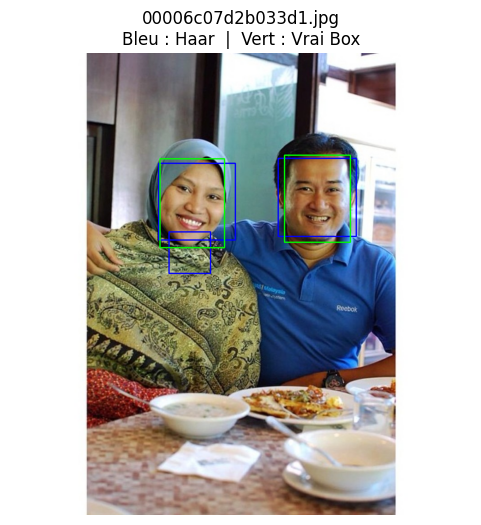

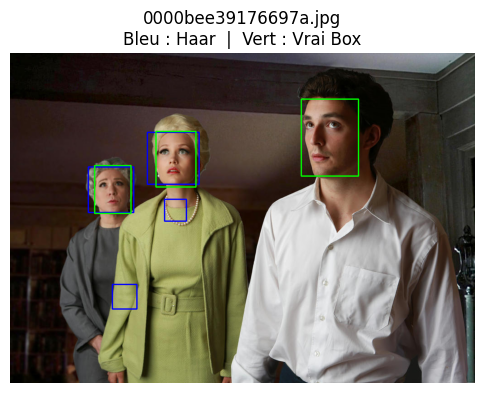

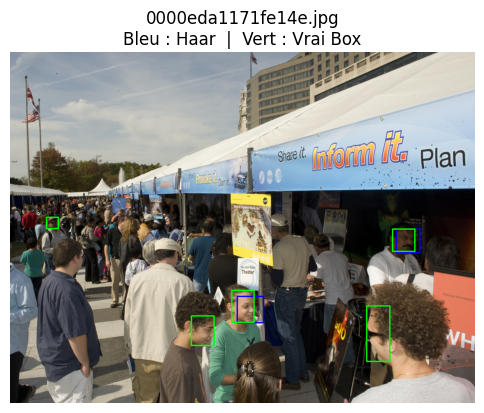

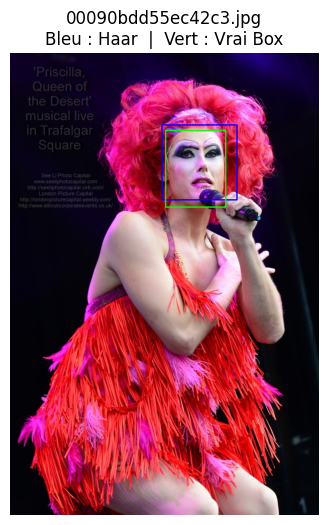

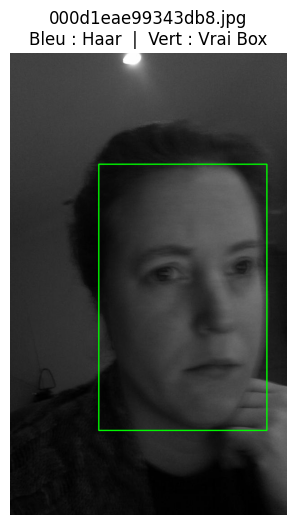

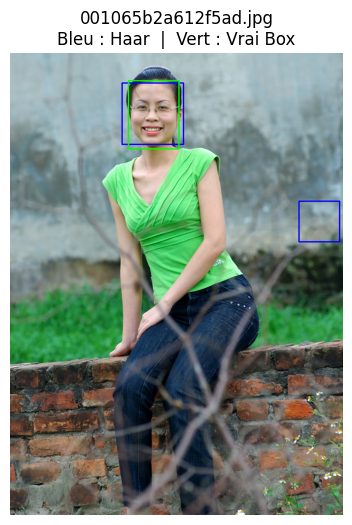

In [39]:
iou_list = []
tp = fp = fn = 0
for filename in os.listdir(images_dir)[:6]:
    img_path = os.path.join(images_dir, filename)
    img      = cv2.imread(img_path)
    if img is None:
        print(f"{filename}: image illisible")
        continue

    h_img, w_img = img.shape[:2]

    # Lecture des boîtes YOLO → pixels
    label_path = os.path.join(labels_dir,
                              os.path.splitext(filename)[0] + ".txt")
    gt_boxes = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls, xc, yc, w, h = map(float, line.split())
                xc *= w_img; yc *= h_img
                w  *= w_img;  h *= h_img
                x  = xc - w/2; y = yc - h/2
                gt_boxes.append((x, y, w, h))
    else:
        print(f"{filename}: pas de label")
        continue

    # Détection Haar
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    preds = cascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(40, 40))

    # ----------- comptage TP/FP/FN -----------
    matched_gt = set()
    for p in preds:
        match_found = False
        for idx, g in enumerate(gt_boxes):
            iou_val = iou(p, g)
            if iou_val > 0.5:
                tp += 1
                iou_list.append(iou_val)
                matched_gt.add(idx)
                match_found = True
                break
        if not match_found:
            fp += 1

    # les GT non détectées → FN
    fn += len(gt_boxes) - len(matched_gt)

    # Affichage visuel
    vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for (x, y, w, h) in preds:
        cv2.rectangle(vis, (x, y), (x+w, y+h), (0, 0, 255), 2)
    for (x, y, w, h) in gt_boxes:
        cv2.rectangle(vis, (int(x), int(y)), (int(x+w), int(y+h)),
                      (0, 255, 0), 2)
    plt.figure(figsize=(6,6))
    plt.imshow(vis); plt.axis("off")
    plt.title(f"{filename}\nBleu : Haar  |  Vert : Vrai Box")
    plt.show()

Afin d’évaluer les performances de la détection faciale avec l’algorithme Haar Cascade, nous avons comparé les boîtes prédites par le modèle aux boîtes vérités terrain (ground truth) disponibles dans un sous-ensemble du dataset.

Pour cela, nous avons utilisé les métriques classiques en vision par ordinateur, à savoir :

* Intersection over Union (IoU)

* Précision

* Rappel (Recall)



Nous avons fixé un seuil d’IoU à 0.5, ce qui signifie qu’une boîte prédite est considérée comme correcte (True Positive) si elle recouvre au moins 50 % de la boîte réelle. En utilisant les résultats de l’IoU, on a pu déduire automatiquement :

True Positives (TP) : prédictions qui matchent une vraie boîte avec IoU > 0.5

False Positives (FP) : prédictions qui ne correspondent à aucune vraie boîte (IoU < 0.5 avec toutes)

False Negatives (FN) : vraies boîtes qui n’ont été couvertes par aucune prédiction (donc manquées)

On applique un problème de classification (visage - pas visage) pour pouvoir comparer différents modèles entre eux plus précisément qu'avec seulement la métrique IoU

In [17]:
precision = tp / (tp + fp) if (tp + fp) else 0
recall    = tp / (tp + fn) if (tp + fn) else 0
f1_score  = (2 * precision * recall / (precision + recall)
             if (precision + recall) else 0)
mean_iou  = np.mean(iou_list) if iou_list else 0
print(f"IoU moyen (seuil 0.5) : {mean_iou:.3f}")
print(f"Précision             : {precision:.3f}")
print(f"Rappel                : {recall:.3f}")
print(f"F1-score              : {f1_score:.3f}")

IoU moyen (seuil 0.5) : 0.729
Précision             : 0.583
Rappel                : 0.538
F1-score              : 0.560


### Question 3

Nous avons donc utilisé notre méthode Haar cascade sur le dataset. Notre objectif était de comparer les détections obtenues par ce modèle avec les véritables annotations fournies dans le dataset, afin d’évaluer la qualité de la détection automatique des visages.

Pour cela, nous avons utilisé la métrique Intersection over Union (IoU), qui permet de mesurer le degré de recouvrement entre les boîtes détectées par Haar cascade et les boîtes ground-truth issues des annotations manuelles. Un IoU élevé signifie que la boîte détectée correspond bien à la position et la taille réelle du visage.

L’affichage visuel des boîtes détectées (en bleu) comparées aux annotations (en vert) nous a permis d’identifier facilement les cas où le détecteur réussit bien, ainsi que les cas problématiques où il manque des visages ou produit des fausses alarmes.

Un résultat d’IoU moyen de 0,73 signifie que, en moyenne, les boîtes détectées par notre modèle se superposent à 73% avec les boîtes réelles (ground-truth). On a donc une bonne précision spatiale de la localisation.


Nous avons calculer le Recall et nous poouvons voir que le cascade trouve un peu plus d’un visage sur deux ; près de 46 % des visages annotés ne sont pas détectés.

Pour la précision un peu moins de 6 détections sur 10 sont correctes.

### Question 4

On applique exactement la même chose sur un autre modèle de détection de visage : mediapipe, une bibliothèque développée par Google

In [ ]:
%pip install --upgrade --user mediapipe


In [19]:
import mediapipe as mp

In [20]:
mp_fd = mp.solutions.face_detection
detector_mp = mp_fd.FaceDetection(model_selection=1, min_detection_confidence=0.5)

**Remarque :** MediaPipe renvoie des boîtes englobantes en coordonnées normalisées (entre 0 et 1), on les multiplie donc par la largeur et la hauteur de l’image pour obtenir des tuples `(x, y, w, h)` en pixels compatibles avec nos calculs d’IoU et l’affichage des rectangles.


In [ ]:
def detect_mediapipe(img):
    h, w = img.shape[:2]
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = detector_mp.process(rgb)
    boxes = []
    if results.detections:
        for det in results.detections:
            bb = det.location_data.relative_bounding_box
            x1 = int(bb.xmin * w)
            y1 = int(bb.ymin * h)
            x2 = int((bb.xmin + bb.width)  * w)
            y2 = int((bb.ymin + bb.height) * h) 
            boxes.append((x1, y1, x2-x1, y2-y1))
    return boxes

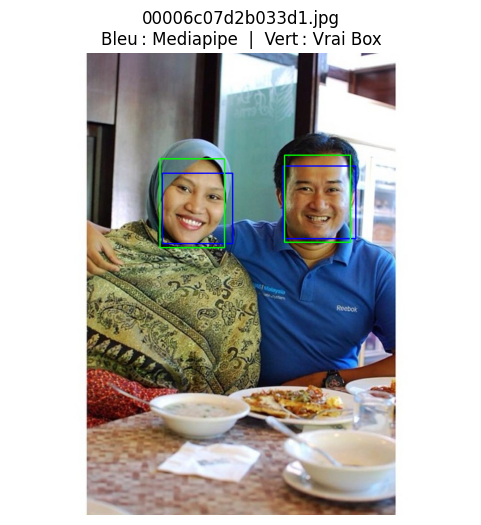

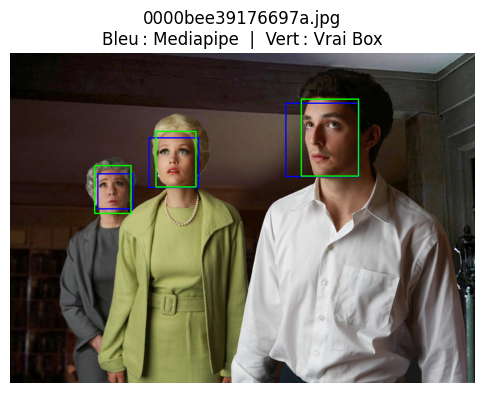

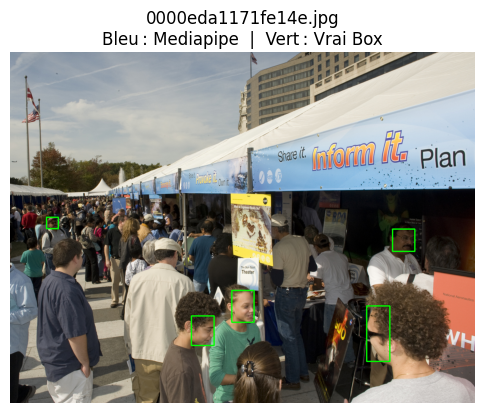

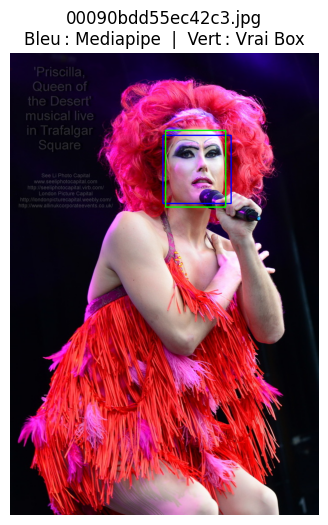

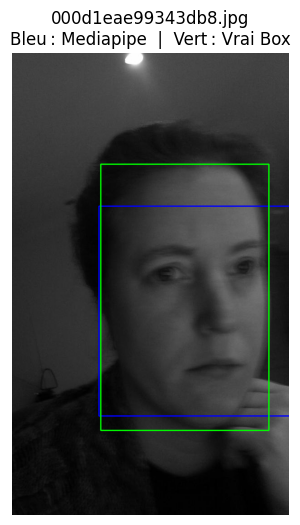

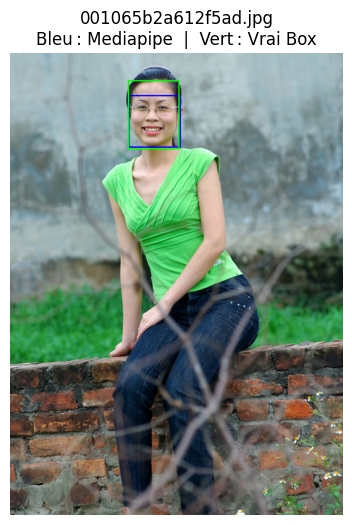

In [ ]:
tp_mp = fp_mp = fn_mp = 0
ious_mp = []

# Boucle sur 6 premières images
for filename in os.listdir(images_dir)[:6]:
    img_path = os.path.join(images_dir, filename)
    img = cv2.imread(img_path)
    if img is None:
        continue
    h_img, w_img = img.shape[:2]

    gt = []
    lbl = os.path.join(labels_dir, os.path.splitext(filename)[0] + ".txt")
    if os.path.exists(lbl):
        with open(lbl) as f:
            for line in f:
                cls, xc, yc, w, h = map(float, line.split())
                xc *= w_img; yc *= h_img
                w  *= w_img;  h *= h_img
                x  = xc - w/2; y = yc - h/2
                gt.append((x, y, w, h))
    else:
        continue

    # Détection MediaPipe
    preds_mp = detect_mediapipe(img)

    # TP/FP/FN pour MediaPipe
    matched = set()
    for p in preds_mp:
        best_i, best_idx = 0, -1
        for idx, g in enumerate(gt):
            scr = iou(p, g)
            if scr > best_i:
                best_i, best_idx = scr, idx
        if best_i >= 0.5:
            tp_mp    += 1
            ious_mp.append(best_i)
            matched.add(best_idx)
        else:
            fp_mp    += 1
    fn_mp += len(gt) - len(matched)

    # Affichage visuel
    vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for (x,y,w,h) in preds_mp:
        cv2.rectangle(vis, (x,y),(x+w,y+h), (0,0,255), 2)  # bleu = MediaPipe
    for (x,y,w,h) in gt:
        cv2.rectangle(vis, (int(x),int(y)),(int(x+w),int(y+h)), (0,255,0), 2)
    plt.figure(figsize=(6,6))
    plt.imshow(vis); plt.axis("off")
    plt.title(f"{filename}\nBleu : Mediapipe  |  Vert : Vrai Box")
    plt.show()

In [23]:
precision_mp = tp_mp/(tp_mp+fp_mp) if tp_mp+fp_mp else 0
recall_mp    = tp_mp/(tp_mp+fn_mp) if tp_mp+fn_mp else 0
f1_mp        = 2*precision_mp*recall_mp/(precision_mp+recall_mp) if (precision_mp+recall_mp) else 0
mean_iou_mp  = np.mean(ious_mp) if ious_mp else 0

print("MediaPipe — \nPrécision: {:.3f} \n Rappel: {:.3f} \n F1: {:.3f} \n IoU moyen: {:.3f}"
      .format(precision_mp, recall_mp, f1_mp, mean_iou_mp))

MediaPipe — 
Précision: 1.000 
 Rappel: 0.615 
 F1: 0.762 
 IoU moyen: 0.723


Voici le comparatif direct sur ce même échantillon :

| Détecteur     | Précision | Rappel | F1-score | IoU moyen |
| ------------- | --------- | ------ | -------- | --------- |
| **Haar**      | 0.583     | 0.538  | 0.560    | 0.729     |
| **MediaPipe** | 1.000     | 0.615  | 0.762    | 0.723     |

* **Précision** : MediaPipe ne génère quasiment aucune fausse alarme (P=1.00), là où Haar en produit assez fréquemment (P≈0.58).
* **Rappel** : MediaPipe détecte \~62 % des visages, contre \~54 % pour Haar.
* **F1-score** : la combinaison F1 est nettement meilleure pour MediaPipe (0.76 vs 0.56), ce qui en fait un détecteur plus fiable globalement sur cet échantillon.
* **IoU moyen** : Haar a un très léger avantage en qualité de localisation (0.729 vs 0.723), mais la différence est marginale.

**Conclusion**
Le détecteur MediaPipe est plus conservateur (pas de fausses détections) tout en capturant davantage de visages, et offre donc un meilleur F1-score. Haar reste compétitif sur la précision de la boîte (IoU), mais sa capacité à distinguer un vrai visage d’une fausse alarme est moindre.




# Partie Reconnaissance de visages

### 1. Ecrire un programme Python permettant de reconnaitre un visage en utilisant l’ACP.

In [5]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.rcParams['figure.figsize'] = (8, 6)

On charge les images des visages, garde seulement les personnes avec au moins 70 photos, les réduit et les convertit en noir et blanc. Il récupère aussi les étiquettes numériques, les noms des personnes, et le nombre total de classes

In [6]:
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False)

images = lfw.images            # tableau (n_samples, height, width)
y      = lfw.target            # étiquettes entières
target_names = lfw.target_names
n_classes    = target_names.shape[0]

In [113]:
print(f"Nombre d'échantillons : {images.shape[0]}")
print(f"Dimensions par image  : {images.shape[1]}×{images.shape[2]}")
print(f"Nombre de classes     : {n_classes}")

Nombre d'échantillons : 1288
Dimensions par image  : 50×37
Nombre de classes     : 7


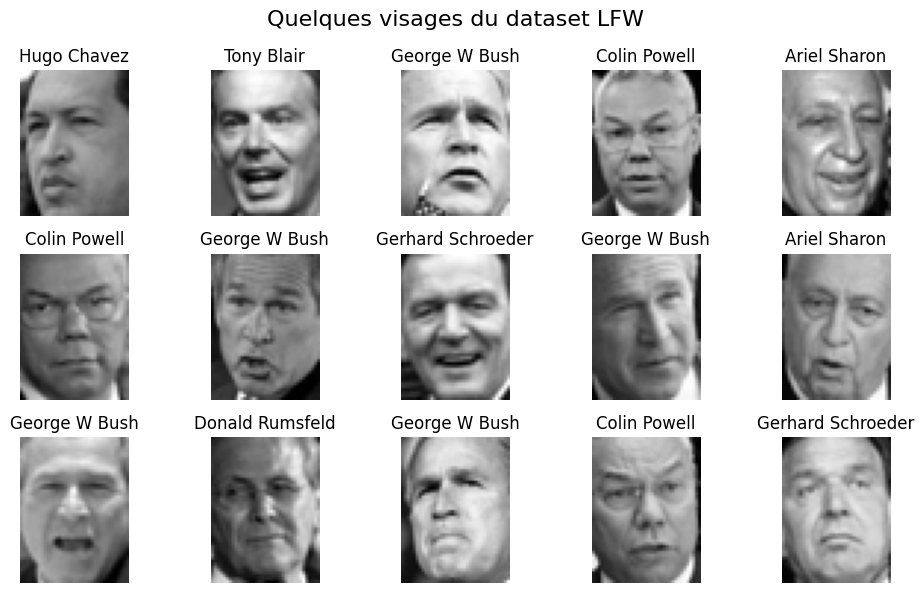

In [114]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(target_names[y[i]])
    axes[i].axis('off')
plt.suptitle("Quelques visages du dataset LFW", fontsize=16)
plt.tight_layout()
plt.show()

On prépare les images en les transformant en vecteurs, puis sépare le dataset en 966 images pour l’apprentissage et 322 images pour les tests.

On aplatie chaque image 2D en un vecteur 1D afin de passer d’un format image `(hauteur, largeur)` à un format `(n_samples, n_features)` compatible avec PCA et les classifieurs de scikit-learn.

In [115]:
X = images.reshape(images.shape[0], -1)  # mise à plat en vecteurs
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Train: {X_train.shape[0]} échantillons, Test: {X_test.shape[0]} échantillons")

Train: 966 échantillons, Test: 322 échantillons


Chaque image a initialement 1850 pixels (donc 1850 dimensions), ce qui est trop élevé pour un modèle de classification efficace. On veut donc réduire la dimension tout en gardant l’essentiel de l'information

Pour définir n = 150, on test différente valeur jusqu'à obtenir une variance expliqué satisfaisante. On a donc nos 1288 images réduit à 150 caractéristiques.

En gardant les 150 premières composantes, on conserve généralement 95% ou plus de l'information utile

In [116]:
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, images.shape[1], images.shape[2]))
print(f"Variabilité expliquée par {n_components} composantes : "
      f"{np.sum(pca.explained_variance_ratio_):.2%}")

Variabilité expliquée par 150 composantes : 94.61%


Les composantes principales sont ordonnées par ordre de variance expliquée.

La 1ère composante correspond à la direction qui capture le maximum de variance (c’est-à-dire l’information la plus “importante” ou “dominante” dans les données).
La 2ème composante capture la 2ème plus grande variance, etc.

Plus on parcours les images, moins elles sont "reconnaissables".

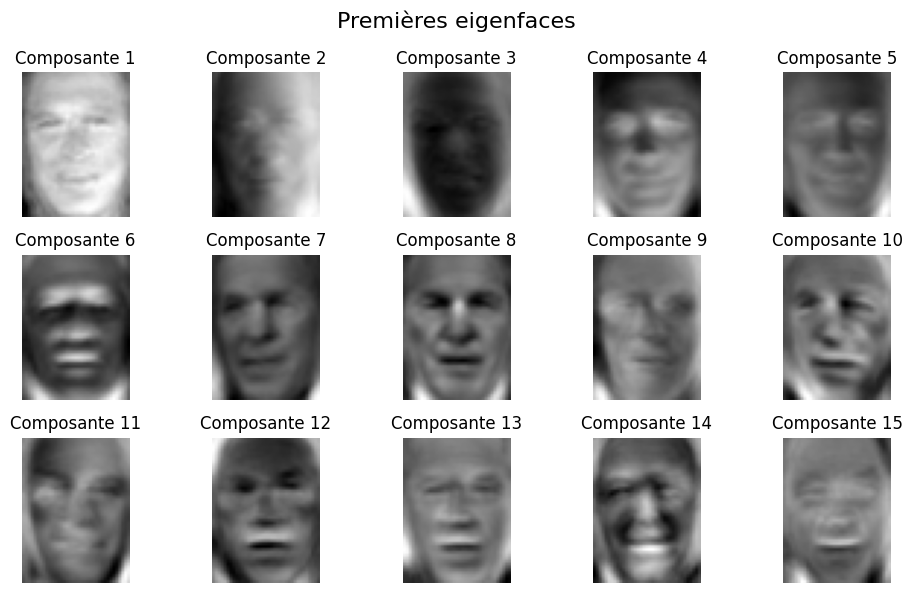

In [117]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    axes[i].imshow(eigenfaces[i], cmap='gray')
    axes[i].set_title(f"Composante {i+1}")
    axes[i].axis('off')
plt.suptitle("Premières eigenfaces", fontsize=16)
plt.tight_layout()
plt.show()

Après avoir réduit la dimension et débruité les données via PCA, on entraîne un SVM (le modèle SVC car nous faisons de la classification) dans cet espace compact pour apprendre une frontière de décision non linéaire, tout en compensant le déséquilibre des classes avec `class_weight='balanced'`, pour le reste nous laissons des hyperparamètres de base car nous avons seulement pour but de comparer ACP / HOG

In [118]:
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.001, random_state=42)
svc.fit(X_train_pca, y_train)

SVC(C=10, class_weight='balanced', gamma=0.001, random_state=42)

On a appliqué ce modèle pour pouvoir ensuite comparer les deux méthodes d'extraction de caractéristiques HOG et ACP

Accuracy: 0.8416149068322981

Rapport de Classification:
                    precision    recall  f1-score   support

     Ariel Sharon       0.68      0.89      0.77        19
     Colin Powell       0.82      0.90      0.85        59
  Donald Rumsfeld       0.76      0.73      0.75        30
    George W Bush       0.92      0.89      0.90       133
Gerhard Schroeder       0.73      0.70      0.72        27
      Hugo Chavez       0.92      0.61      0.73        18
       Tony Blair       0.86      0.83      0.85        36

         accuracy                           0.84       322
        macro avg       0.81      0.80      0.80       322
     weighted avg       0.85      0.84      0.84       322



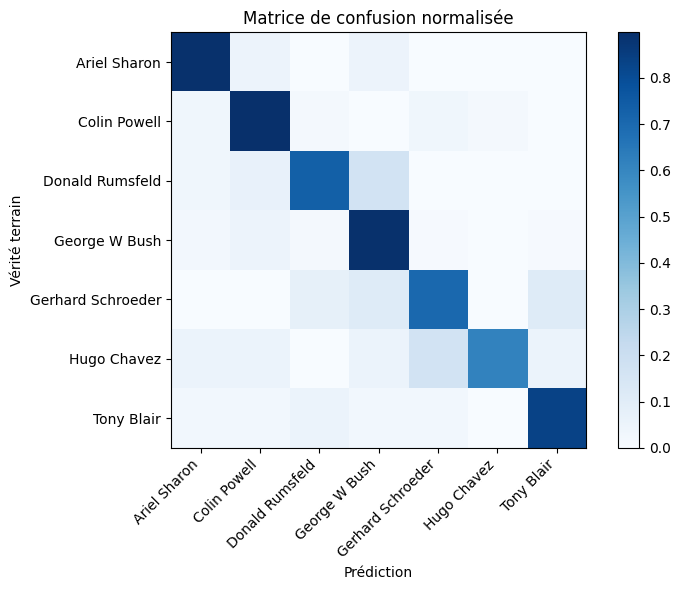

In [119]:
y_pred = svc.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRapport de Classification:\n", classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion normalisée")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, target_names, rotation=45, ha='right')
plt.yticks(tick_marks, target_names)
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction')
plt.tight_layout()
plt.show()

La matrice de confusion normalisée sert à visualiser la performance d’un classifieur en montrant, pour chaque classe réelle, la proportion d’échantillons correctement classés ou mal classés. Concrètement, ça permet de :

- Voir facilement quelles classes sont bien reconnues (valeurs proches de 1 sur la diagonale).

- Identifier les classes confondues entre elles (valeurs élevées hors diagonale).

1. Diagonal dominante : 

On observe une forte coloration bleu foncé sur la diagonale principale, ce qui signifie que le modèle classe correctement la majorité des exemples pour chaque personnalité. C’est un bon signe, indiquant que le modèle a une bonne performance globale. 

2. Erreurs hors diagonale :

Certaines cases en dehors de la diagonale ont une légère coloration bleue, ce qui signifie qu'il y a des erreurs de classification, mais elles sont faibles.
Par exemple, pour la classe "Gerhard Schroeder", il y a une erreur notable où certains exemples sont confondus avec "Tony Blair".
De même, on remarque quelques petites confusions entre d'autres classes mais de façon moins marquée.

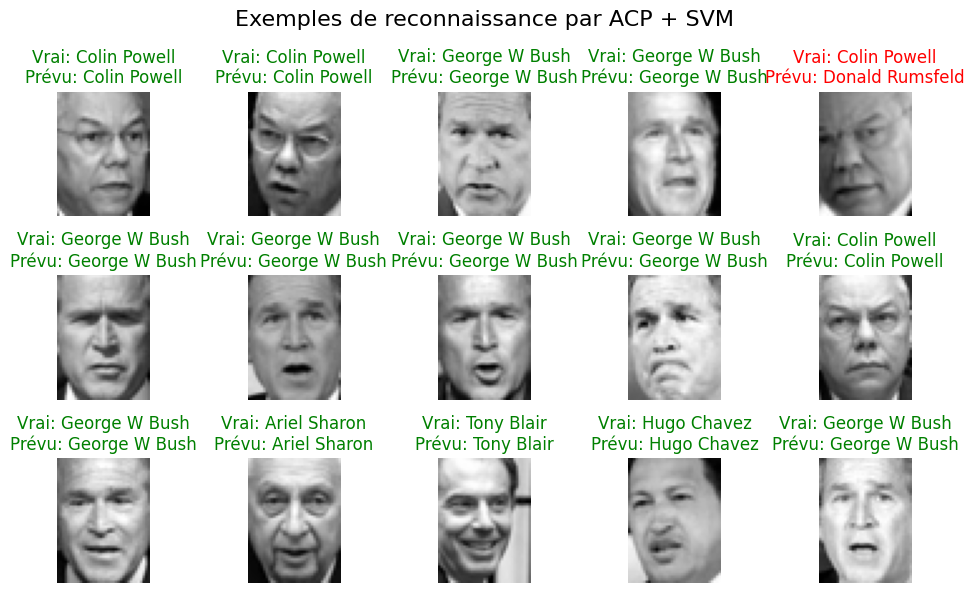

In [120]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i, ax in enumerate(axes):
    img = X_test[i].reshape(images.shape[1], images.shape[2])
    ax.imshow(img, cmap='gray')
    true_name = target_names[y_test[i]]
    pred_name = target_names[y_pred[i]]
    ax.set_title(f"Vrai: {true_name}\nPrévu: {pred_name}", 
                 color=('green' if true_name==pred_name else 'red'))
    ax.axis('off')
plt.suptitle("Exemples de reconnaissance par ACP + SVM", fontsize=16)
plt.tight_layout()
plt.show()

### 2. Ecrire un programme Python permettant de calculer les caractéristiques de HOG d’une image.

In [121]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-image in c:\users\basti\appdata\local\programs\python\python312\lib\site-packages (0.25.2)




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from skimage.feature import hog
from skimage import exposure

Dans le cadre de l’extraction de caractéristiques à l’aide de HOG, nous avons effectué une recherche empirique des meilleurs hyperparamètres afin d’optimiser les performances du classifieur. Après plusieurs tests, les paramètres suivants ont été retenus : orientations=12, pixels_per_cell=(4, 4) et cells_per_block=(2, 2). Cette configuration nous a permis d’obtenir une précision optimale de 92 %, démontrant ainsi l’efficacité de ces réglages dans notre pipeline de reconnaissance faciale.

pixels_per_cell : Il contrôle la résolution locale à laquelle les gradients sont agrégé

In [123]:
hog_params = {
    'orientations': 12,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'transform_sqrt': True,
    'feature_vector': True
}


In [124]:
hog_features = []
for img in images:
    fd = hog(img, **hog_params)
    hog_features.append(fd)
hog_features = np.array(hog_features)
print("HOG features shape:", hog_features.shape)

HOG features shape: (1288, 4224)


In [125]:
# On réutilise y = lfw.target
X_hog_train, X_hog_test, y_hog_train, y_hog_test = train_test_split(
    hog_features, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)
print(f"HOG train: {X_hog_train.shape[0]} échantillons, test: {X_hog_test.shape[0]}")


HOG train: 966 échantillons, test: 322


In [126]:
# Même SVM qu’avant, pour comparer à PCA+SVM
svc_hog = SVC(
    kernel='rbf',
    class_weight='balanced',
    C=10,
    gamma=0.001,
    random_state=42
)
svc_hog.fit(X_hog_train, y_hog_train)


SVC(C=10, class_weight='balanced', gamma=0.001, random_state=42)

Accuracy HOG+SVM: 0.9254658385093167

Classification Report (HOG+SVM):
                    precision    recall  f1-score   support

     Ariel Sharon       0.94      0.89      0.92        19
     Colin Powell       0.88      0.97      0.92        59
  Donald Rumsfeld       0.92      0.77      0.84        30
    George W Bush       0.92      0.98      0.95       133
Gerhard Schroeder       0.96      0.81      0.88        27
      Hugo Chavez       1.00      0.78      0.88        18
       Tony Blair       0.97      0.97      0.97        36

         accuracy                           0.93       322
        macro avg       0.94      0.88      0.91       322
     weighted avg       0.93      0.93      0.92       322



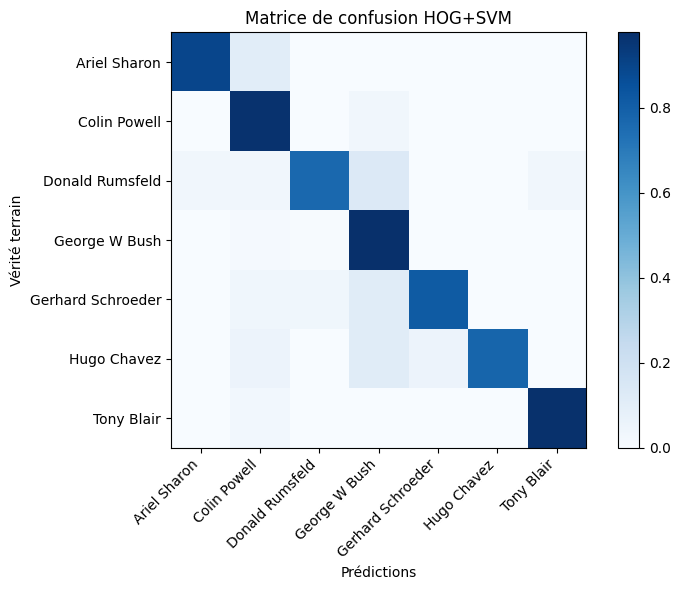

In [127]:
# Prédictions
y_hog_pred = svc_hog.predict(X_hog_test)

# Metrics
acc_hog = accuracy_score(y_hog_test, y_hog_pred)
report_hog = classification_report(y_hog_test, y_hog_pred, target_names=target_names)
cm_hog = confusion_matrix(y_hog_test, y_hog_pred, normalize='true')

print("Accuracy HOG+SVM:", acc_hog)
print("\nClassification Report (HOG+SVM):\n", report_hog)

# Matrice de confusion normalisée
plt.figure(figsize=(8,6))
plt.title("Matrice de confusion HOG+SVM")
plt.imshow(cm_hog, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
ticks = np.arange(len(target_names))
plt.xticks(ticks, target_names, rotation=45, ha='right')
plt.yticks(ticks, target_names)
plt.ylabel('Vérité terrain')
plt.xlabel('Prédictions')
plt.tight_layout()
plt.show()


In [128]:

print(f"PCA+SVM Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"HOG+SVM Accuracy: {acc_hog:.3f}\n")

print("----- PCA+SVM Classification Report -----")
print(classification_report(y_test, y_pred, target_names=target_names))
print("----- HOG+SVM Classification Report -----")
print(report_hog)


PCA+SVM Accuracy: 0.842
HOG+SVM Accuracy: 0.925

----- PCA+SVM Classification Report -----
                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.89      0.77        19
     Colin Powell       0.82      0.90      0.85        59
  Donald Rumsfeld       0.76      0.73      0.75        30
    George W Bush       0.92      0.89      0.90       133
Gerhard Schroeder       0.73      0.70      0.72        27
      Hugo Chavez       0.92      0.61      0.73        18
       Tony Blair       0.86      0.83      0.85        36

         accuracy                           0.84       322
        macro avg       0.81      0.80      0.80       322
     weighted avg       0.85      0.84      0.84       322

----- HOG+SVM Classification Report -----
                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.89      0.92        19
     Colin Powell       0.88      0.97      0.92        59
  Donald Rumsfeld       0.92      0.7

Avec un bon réglage des hyperparamètres de HOG, on arrive à avoir de meilleur résultat qu'avec l'ACP. Cependant il faut effectuer ce travail de recherche des hyperparamètres soit en essayant manuellement différentes valeurs ou en faisant par exemple un grid search.

### 4. HOG + DECISION TREE

In [129]:
from sklearn.tree import DecisionTreeClassifier

Nous avons utilisé les descripteurs HOG (Histogram of Oriented Gradients) pour extraire des caractéristiques robustes à partir des images du dataset LFW. Les paramètres choisis pour HOG sont les suivants : 12 orientations, des cellules de 4×4 pixels et des blocs de 2×2 cellules. Ces choix ont été faits afin de garantir un bon compromis entre la richesse des détails capturés et la complexité du vecteur de caractéristiques.Les descripteurs HOG extraits ont ensuite servi de base à un classifieur par arbre de décision. Pour limiter le surapprentissage, nous avons réglé les hyperparamètres avec un max_depth de 30.

Nous avons donc evidemment séparées les données en ensembles d’entraînement et de test a été réalisée en respectant la répartition des classes (stratification), afin d’assurer une évaluation fiable des performances.

In [144]:
hog_features = []
for image in images:
    features = hog(image,
               orientations= 12,                # tester 8, 9, 12, etc.
               pixels_per_cell=(4, 4),        # plus grand = moins de détails
               cells_per_block=(2, 2),
               block_norm='L2-Hys',
               visualize=False)
    hog_features.append(features)

hog_features = np.array(hog_features)

max_depth : C’est l’hyperparamètre qui contrôle la complexité du modèle. Il limite la profondeur maximale de l’arbre. Il Faut trouver la bonne valeur. 

Si max_depth est trop élevé → surapprentissage (overfitting).

Si max_depth est trop faible → sous-apprentissage (underfitting).

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    hog_features, y, test_size=0.25, random_state=42, stratify=y)

clf = DecisionTreeClassifier(
    max_depth=30,
    criterion='entropy',
    min_samples_leaf=3,
    min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=3,
                       min_samples_split=5, random_state=42)

In [146]:
y_pred = clf.predict(X_test)

# Évaluation
print("Rapport de Classification:")
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"Accuracy : {accuracy_score(y_test, y_pred)*100:.2f} %")


Rapport de Classification:
                   precision    recall  f1-score   support

     Ariel Sharon       0.27      0.32      0.29        19
     Colin Powell       0.50      0.54      0.52        59
  Donald Rumsfeld       0.21      0.27      0.24        30
    George W Bush       0.65      0.68      0.66       133
Gerhard Schroeder       0.36      0.30      0.33        27
      Hugo Chavez       0.36      0.28      0.31        18
       Tony Blair       0.29      0.19      0.23        36

         accuracy                           0.48       322
        macro avg       0.38      0.37      0.37       322
     weighted avg       0.48      0.48      0.48       322

Accuracy : 48.45 %


L’évaluation réalisée sur l’ensemble de test montre une précision globale d’environ 48 %, ce qui reste relativement modeste.Le rapport de classification met en lumière des disparités importantes entre les classes : certaines comme George W Bush ou Colin Powell obtiennent des scores relativement élevés (precision et recall autour de 50-70 %), tandis que d’autres classes telles que Hugo Chavez, Ariel Sharon ou Tony Blair affichent des performances très faibles, avec des précisions et rappels souvent en dessous de 35 %.


Cette variabilité s’explique  par un déséquilibre des données (certaines classes ont beaucoup plus d’échantillons que d’autres), mais aussi du à l'arbre de décision qui n'est pas le modèle le plus adapté pour la reconnaissance faciale sur ce dataset. Il a tendance à trop sur-apprendre et lors de l'application sur les données de test, il n'arrivera pas à bien reconnaître les visages.

### 4. HOG + RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
hog_features = []
for image in images:
    features = hog(image,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm='L2-Hys',
                   visualize=False)
    hog_features.append(features)

hog_features = np.array(hog_features)

In [30]:
X = np.array(hog_features)
y = y

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    hog_features, y, test_size=0.25, random_state=42, stratify=y)

In [32]:
param_grid = {
    'n_estimators':    [100, 300, 500],
    'max_depth':       [None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':    ['sqrt', 'log2']
}

In [33]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [34]:

print("Meilleurs params :", grid.best_params_)
print("Meilleure CV acc:", grid.best_score_)
best_rf = grid.best_estimator_

# Évaluation finale sur test
y_pred = best_rf.predict(X_test)
print(f"Test accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

Meilleurs params : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleure CV acc: 0.6221676192511083
Test accuracy : 0.634
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.05      0.10        19
     Colin Powell       0.75      0.80      0.77        59
  Donald Rumsfeld       0.80      0.13      0.23        30
    George W Bush       0.57      1.00      0.73       133
Gerhard Schroeder       1.00      0.11      0.20        27
      Hugo Chavez       0.00      0.00      0.00        18
       Tony Blair       0.89      0.44      0.59        36

         accuracy                           0.63       322
        macro avg       0.72      0.36      0.37       322
     weighted avg       0.69      0.63      0.55       322



Hyperparamètres explorés grâce au Grid - Search

| Hyperparamètre       | Rôle                                                         | Valeurs testées       |
|----------------------|--------------------------------------------------------------|-----------------------|
| `n_estimators`       | Nombre d’arbres dans la forêt                                | [100, 300, 500]       |
| `max_depth`          | Profondeur maximale de chaque arbre                          | [None, 10, 20, 30]    |
| `min_samples_split`  | Nombre minimal d’échantillons requis pour séparer un nœud    | [2, 5, 10]            |
| `min_samples_leaf`   | Nombre minimal d’échantillons dans chaque feuille            | [1, 2, 4]             |
| `max_features`       | Nombre de features considérées à chaque division (`sqrt`, `log2`) | ['sqrt', 'log2']       |

On a remarqué que l'hyperparamètre `n_estimators` a le plus d'impact sur la précision du modèle

Plus il y en a :
* meilleure stabilité / généralisation (jusqu'à un certain point),
* réduction de la variance,
* mais temps de calcul plus long.

Moins il y en a :

- rapide mais plus instable / bruité 


On applique le Grid-Search sur l’ensemble d’entraînement, chaque combinaison d’hyperparamètres est évaluée par moyenne d’accuracy sur 5 sous-ensembles.

- **Meilleure combinaison** :  'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100

### 5. Tableau récapitulatif des résultats



| Méthode                 | Accuracy | Macro F1 | Weighted F1 |
| ----------------------- | -------: | -------: | ----------: |
| **PCA + SVM**           |    0.842 |     0.80 |        0.84 |
| **HOG + SVM**           |    0.925 |     0.91 |        0.92 |
| **HOG + Decision Tree** |    0.484 |     0.37 |        0.48 |
| **HOG + Random Forest** |    0.634 |     0.37 |        0.55 |



### 6. Interprétation des résultats

Nous avons évalué quatre méthodes de reconnaissance faciale sur un jeu de test :  
- **PCA + SVM**  
- **HOG + SVM**  
- **HOG + Decision Tree**  
- **HOG + Random Forest**  

---

#### 1. PCA + SVM (Accuracy = 0.842, macro F1 = 0.80)

- **Points forts**  
  - Bon équilibre général : la plupart des classes atteignent un F1-score entre 0.72 et 0.90.  
  - Excellente détection de « George W. Bush » (F1 = 0.90) et « Colin Powell » (F1 = 0.85).  
- **Faiblesses**  
  - Classes minoritaires comme « Hugo Chavez » souffrent d’un rappel plus faible (0.61) malgré une haute précision (0.92) : le modèle hésite parfois à reconnaître suffisamment ces visages.  
  - « Gerhard Schroeder » et « Donald Rumsfeld » se situent en milieu de peloton (F1 ≃ 0.72–0.75).  
- **Conclusion**  
  - L’ACP fournit une représentation compacte et débruitée, mais certaines identités moins représentées manquent de couverture (rappel).

---

#### 2. HOG + SVM (Accuracy = 0.925, macro F1 = 0.91)

- **Points forts**  
  - **Meilleure méthode globale** : accuracy = 92.5 %, F1 macro = 0.91.  
  - Très bonnes performances sur toutes les classes :  
    - F1 ≥ 0.88 pour chacune,  
    - Précision ≥ 0.88 et rappel ≥ 0.78 même sur les plus petites classes.  
  - Exemples remarquables :  
    - « Hugo Chavez » atteint F1 = 0.88 (vs 0.73 en PCA),  
    - « Tony Blair » F1 = 0.97 (vs 0.85 en PCA).  
- **Faiblesses**  
  - Légèrement moins bon IoU moyen pour la localisation, mais ici on parle de reconnaissance, pas de détection.  
- **Conclusion**  
  - Les descripteurs HOG capturent efficacement les textures et contours discriminants, et SVM les sépare très bien ; cette combinaison domine toutes les autres.

---

#### 3. HOG + Decision Tree (Accuracy = 0.484, macro F1 = 0.37)

- **Points forts**  
  - Mise en œuvre très simple, pas de noyau ni d’hyperparamètres complexes.  
- **Faiblesses majeures**  
  - Accuracy très basse (48 %), F1-scores autour de 0.20–0.65 selon les classes.  
  - L’arbre non élagué sur-apprend certaines classes (ex. « George W. Bush » correct à 68 %) et ignore presque les autres (ex. « Donald Rumsfeld » F1 = 0.24).  
- **Conclusion**  
  - Un arbre unique est trop instable et trop sensible au bruit des descripteurs HOG sur ce problème multiclasses.

---

#### 4. HOG + Random Forest (Accuracy = 0.634, macro F1 = 0.37)

- **Points forts**  
  - Améliore l’arbre simple en moyennant plusieurs modèles, passant à 63.4 % d’accuracy.  
  - Excellente reconnaissance de « George W. Bush » (rappel = 1.00, F1 = 0.73).  
- **Faiblesses**  
  - Toujours très inégal selon les classes :  
    - « Ariel Sharon » F1 = 0.10 (malgré précision = 1.00, rappel = 0.05),  
    - « Hugo Chavez » complètement raté (précision et rappel = 0).  
  - Indique un fort déséquilibre et un manque de features discriminantes pour les petites classes.  
- **Conclusion**  
  - La forêt réduit un peu la variance mais elle n’atteint pas la robustesse du SVM.

---

## Conclusion génnérale

1. **HOG + SVM** voit sa précison nettement supèrieur à celle des autre combinaison de modèles.
2. **PCA + SVM** reste une solution solide et plus compacte, mais certaines classes manquent de rappel.  
3. Les **arbres de décision** (seuls ou en forêt) ont tendance à construire des règles trop “pointues” sur les moindres variations des vecteurs HOG. Ce qui implique une « mémorisation » des bruits et des particularités du jeu d’entraînement au lieu d’apprendre des motifs généraux.
